[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Naive Bayes Accuracy: 0.6812492330347282
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.34      0.49      7179
           1       0.72      0.65      0.68     11034
           2       0.64      0.87      0.74     14383

    accuracy                           0.68     32596
   macro avg       0.74      0.62      0.64     32596
weighted avg       0.71      0.68      0.66     32596

Naive Bayes Confusion Matrix:
 [[ 2471  1274  3434]
 [   98  7211  3725]
 [  306  1553 12524]]


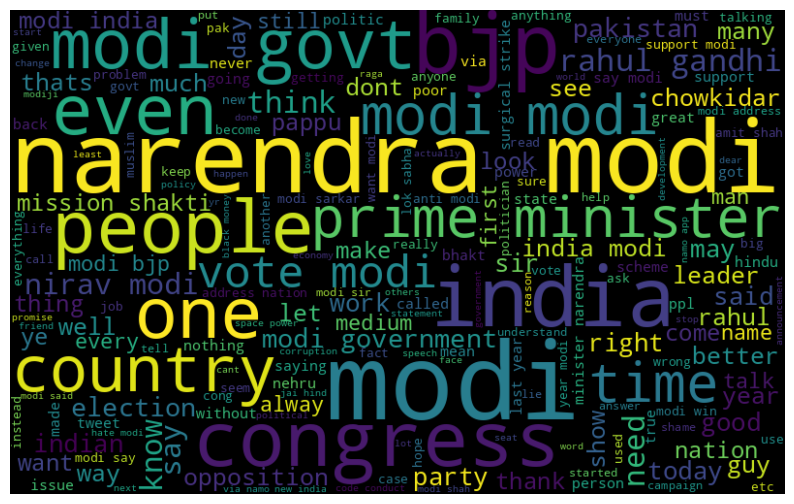

The column 'sentiment' does not exist in the DataFrame.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load data
twitter_data = pd.read_csv('/content/Twitter_Data.csv')

# Check if the required columns exist
if 'clean_text' not in twitter_data.columns:
    raise ValueError("The column 'clean_text' does not exist in the DataFrame.")
if 'category' not in twitter_data.columns:
    raise ValueError("The column 'category' does not exist in the DataFrame.")

# Fill missing values in the category column
twitter_data['category'].fillna('Unknown', inplace=True)

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()  # Lowercase text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(tokens)

twitter_data['clean_text'] = twitter_data['clean_text'].apply(preprocess_text)

# Ensure the category column is of type 'category'
twitter_data['category'] = twitter_data['category'].astype('category')

# Feature Engineering
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(twitter_data['clean_text']).toarray()
y = twitter_data['category'].cat.codes  # Convert categories to numerical codes

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model: Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

#=

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)



print(f'Naive Bayes Accuracy: {accuracy_nb}')
print('Naive Bayes Classification Report:\n', report_nb)
print('Naive Bayes Confusion Matrix:\n', conf_matrix_nb)



# Data Visualization
# Word Cloud
all_words = ' '.join([text for text in twitter_data['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Distribution
if 'sentiment' in twitter_data.columns:
    sns.countplot(x='sentiment', data=twitter_data)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
else:
    print("The column 'sentiment' does not exist in the DataFrame.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/10
4075/4075 [==============================] - 19s 4ms/step - loss: 0.6285 - accuracy: 0.7600 - val_loss: 0.5676 - val_accuracy: 0.7922
Epoch 2/10
4075/4075 [==============================] - 17s 4ms/step - loss: 0.5559 - accuracy: 0.7953 - val_loss: 0.5592 - val_accuracy: 0.7947
Epoch 3/10
4075/4075 [==============================] - 17s 4ms/step - loss: 0.5203 - accuracy: 0.8079 - val_loss: 0.5572 - val_accuracy: 0.7957
Epoch 4/10
4075/4075 [==============================] - 20s 5ms/step - loss: 0.4836 - accuracy: 0.8211 - val_loss: 0.5611 - val_accuracy: 0.7972
Epoch 5/10
4075/4075 [==============================] - 16s 4ms/step - loss: 0.4413 - accuracy: 0.8368 - val_loss: 0.5772 - val_accuracy: 0.7963
Epoch 6/10
4075/4075 [==============================] - 17s 4ms/step - loss: 0.4046 - accuracy: 0.8511 - val_loss: 0.5932 - val_accuracy: 0.7965
Epoch 7/10
4075/4075 [==============================] - 17s 4ms/step - loss: 0.3711 - accuracy: 0.8632 - val_loss: 0.6169 - val_ac

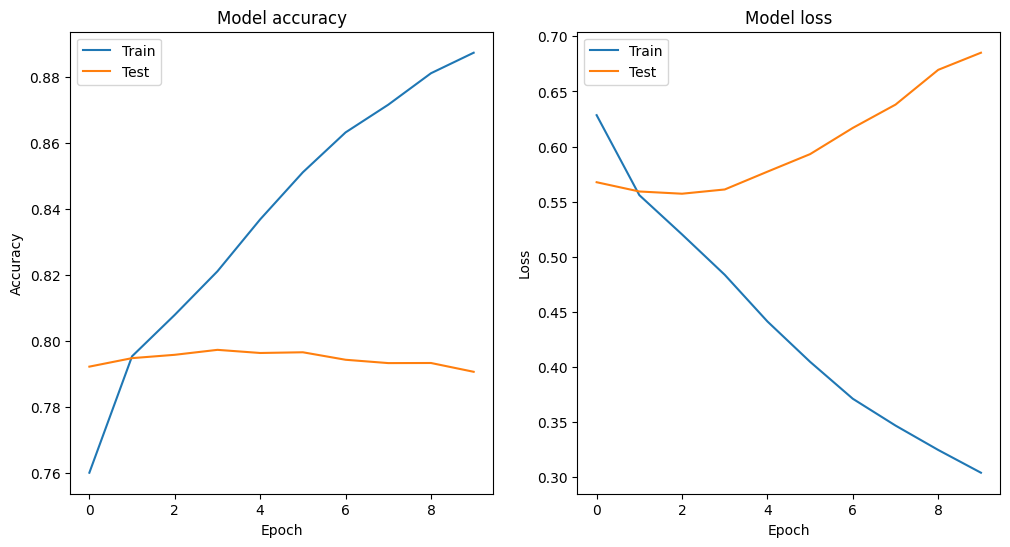

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load data
twitter_data = pd.read_csv('/content/Twitter_Data.csv', encoding='latin1')

# Check if the required columns exist
if 'clean_text' not in twitter_data.columns:
    raise ValueError("The column 'clean_text' does not exist in the DataFrame.")
if 'category' not in twitter_data.columns:
    raise ValueError("The column 'category' does not exist in the DataFrame.")

# Fill missing values in the category column
twitter_data['category'].fillna('Unknown', inplace=True)

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()  # Lowercase text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(tokens)

twitter_data['clean_text'] = twitter_data['clean_text'].apply(preprocess_text)

# Ensure the category column is of type 'category'
twitter_data['category'] = twitter_data['category'].astype('category')

# Feature Engineering
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(twitter_data['clean_text']).toarray()
y = twitter_data['category'].cat.codes  # Convert categories to numerical codes

# Verify the number of unique categories
num_classes = len(np.unique(y))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Deep Learning Model
# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Define the model
model_dl = Sequential()
model_dl.add(Dense(512, input_dim=1000, activation='relu'))
model_dl.add(Dropout(0.5))
model_dl.add(Dense(256, activation='relu'))
model_dl.add(Dropout(0.5))
model_dl.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_dl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_dl.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test, y_test_cat))

# Evaluate the model
loss, accuracy_dl = model_dl.evaluate(X_test, y_test_cat)
y_pred_dl = model_dl.predict(X_test)
y_pred_dl = np.argmax(y_pred_dl, axis=1)

# Deep Learning Evaluation
report_dl = classification_report(y_test, y_pred_dl)
conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)

print(f'Deep Learning Accuracy: {accuracy_dl}')
print('Deep Learning Classification Report:\n', report_dl)
print('Deep Learning Confusion Matrix:\n', conf_matrix_dl)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
